In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import kagglehub

# Load dataset
path = kagglehub.dataset_download(
    "vjchoudhary7/customer-segmentation-tutorial-in-python"
)
df = pd.read_csv(path + "/Mall_Customers.csv")


Using Colab cache for faster access to the 'customer-segmentation-tutorial-in-python' dataset.


In [29]:

# Select features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

silhouette_scores = []

for i in range(2, 11):  # silhouette requires at least 2 clusters
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        n_init=10,
        random_state=42
    )
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)


# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        n_init=10,
        random_state=42
    )
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)




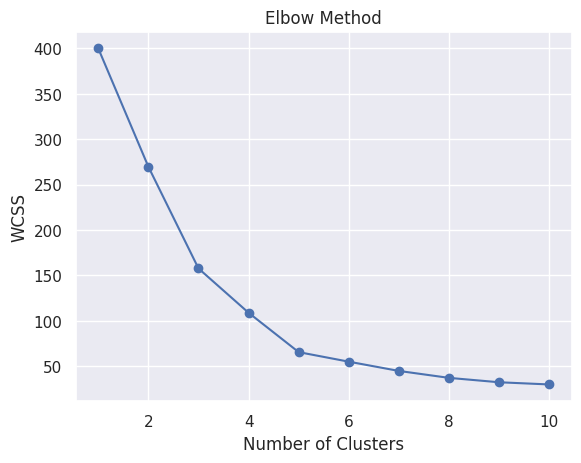

In [30]:
# Plot elbow curve
sns.set()
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

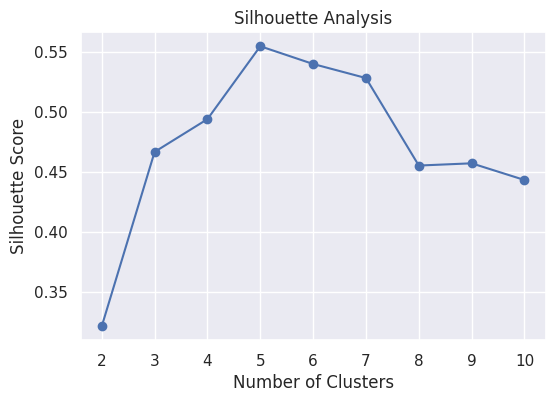

In [31]:
plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [32]:
best_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"Best number of clusters based on silhouette score: {best_k}")
print(f"Highest silhouette score: {max(silhouette_scores):.3f}")


Best number of clusters based on silhouette score: 5
Highest silhouette score: 0.555


In [33]:

# Train final model
kmeans = KMeans(
    n_clusters=5,
    init='k-means++',
    n_init=10,
    random_state=42
)
y_kmeans = kmeans.fit_predict(X_scaled)

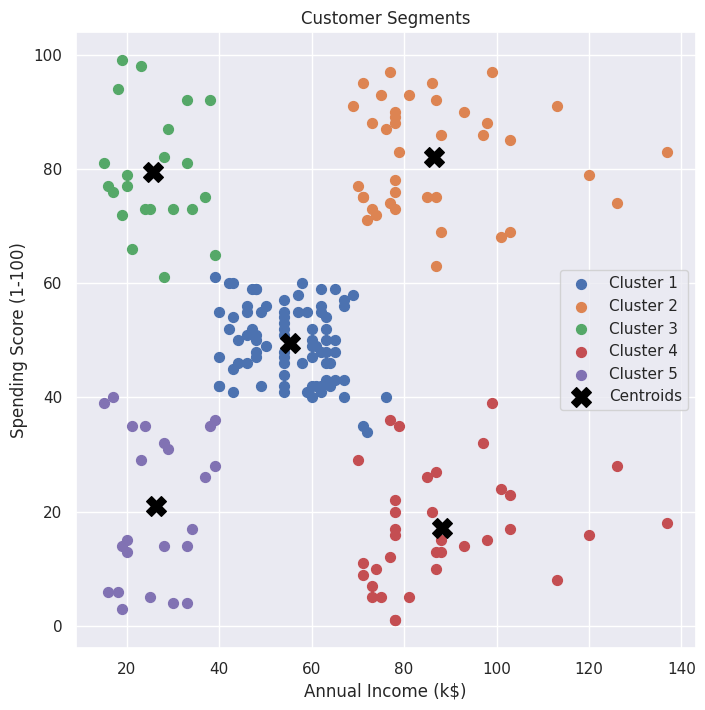

In [34]:



# Visualize clusters
plt.figure(figsize=(8, 8))
for i in range(5):
    plt.scatter(
        X[y_kmeans == i, 0],
        X[y_kmeans == i, 1],
        s=50,
        label=f'Cluster {i+1}'
    )

# Centroids (inverse scale for correct plotting)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    s=200,
    c='black',
    marker='X',
    label='Centroids'
)

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Project Conclusion

In this project, K-Means clustering was successfully applied to segment mall customers based on their annual income and spending behavior. Prior to modeling, the data was explored, cleaned, and standardized to ensure accurate distance-based clustering.

The Elbow Method was used to identify an optimal number of clusters, which was further validated using Silhouette Analysis. Both techniques indicated that five clusters provide a good balance between cluster cohesion and separation.

The resulting customer segments revealed meaningful and actionable patterns:

High-income, high-spending customers were identified as the most valuable segment, representing ideal candidates for premium services and loyalty programs.

High-income, low-spending customers showed strong potential for revenue growth through targeted marketing and personalized offers.

Low-income, high-spending customers demonstrated high engagement but required cautious product positioning.

Low-income, low-spending customers were found to be price-sensitive and suitable for discount-based strategies.

Average customers formed a stable base with opportunities for gradual upselling.

Overall, this segmentation enables businesses to optimize marketing strategies, allocate resources efficiently, and increase customer lifetime value by tailoring approaches to each customer group. The project demonstrates how unsupervised learning techniques like K-Means can transform raw customer data into valuable business insights and support data-driven decision-making.

In [35]:
df['Cluster'] = y_kmeans

df.groupby('Cluster')[[
    'Annual Income (k$)',
    'Spending Score (1-100)'
]].mean()


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043
